In [1]:
import pandas as pd
import sys

In [2]:
sys.path.append('../')

In [3]:
import src.kmeans as km

In [4]:
dir(km)

['DistanceMethodNotValidError',
 'KMeansClustering',
 'NotSameLength',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'np',
 'pd',
 'time']

In [5]:
df1 = pd.read_csv('../datasets/kmeans_kmedoids/iris-dataset.csv')

In [6]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df2 = pd.read_csv('../datasets/kmeans_kmedoids/Iris.csv')

In [8]:
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
classifier = km.KMeansClustering()

In [12]:
classifier.train(df1,[0,1,2,3],3)

4.548600673675537


In [13]:
classifier.df.Label.value_counts()

0    65
1    51
2    34
Name: Label, dtype: int64

In [14]:
df2.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [15]:
classifier.df

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [16]:
df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
df2.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
df3 = classifier.df.copy()
df3.loc[df3['Label'] == 1, 'Label'] = 'Iris-setosa'
df3.loc[df3['Label'] == 0, 'Label'] = 'Iris-virginica'
df3.loc[df3['Label'] == 2, 'Label'] = 'Iris-versicolor'

In [19]:
acc = (df3['Label'] == df2.Species)

In [20]:
acc.value_counts()

True     134
False     16
dtype: int64

In [21]:
df4 = pd.read_csv('../datasets/kmeans_kmedoids/xclara.csv')

In [22]:
df4

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


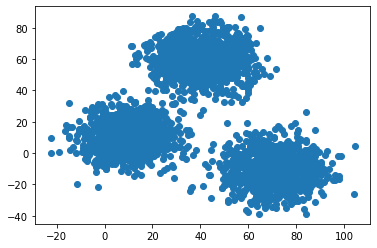

In [23]:
import matplotlib.pyplot as plt

plt.scatter(x = df4['V1'], y = df4['V2'])
plt.show()

In [24]:
classifier2 = km.KMeansClustering()

In [25]:
classifier2.train(df4,[0,1],3)

58.2933349609375


In [26]:
classifier2.df

,V1,V2,Label
0,2.072345,-3.241693,1
1,17.936710,15.784810,1
2,1.083576,7.319176,1
3,11.120670,14.406780,1
4,23.711550,2.557729,1
...,...,...,...
2995,85.652800,-6.461061,2
2996,82.770880,-2.373299,2
2997,64.465320,-10.501360,2
2998,90.722820,-12.255840,2


In [27]:
import numpy as np
np.array(df4['V1'])

array([ 2.072345, 17.93671 ,  1.083576, ..., 64.46532 , 90.72282 ,
       64.87976 ])

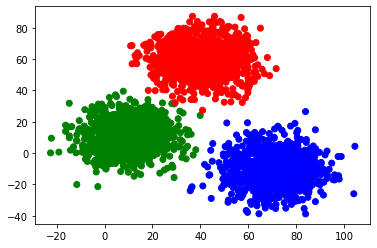

In [28]:
colormap = np.array(['r', 'g', 'b'])
labels = np.array(classifier2.df.Label)
plt.scatter(x = classifier2.df['V1'], y = classifier2.df['V2'], c=colormap[labels])
plt.show()

In [29]:
labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [30]:
classifier.df

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [31]:
df2.sample()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
35,36,5.0,3.2,1.2,0.2,Iris-setosa


In [33]:
import time

In [36]:
def my_sum(arr,arr2,mode):
    if len(arr) != len(arr2):
        raise Exception()
    if mode == 1:
        start1 = time.time()
        res = 0
        for i in range(len(arr)):
            res += (arr[i] - arr2[i])
        print(time.time()-start1)
        return res
    else:
        start2 = time.time()
        arr_ = np.array(arr)
        arr2_ = np.array(arr2)
        print(time.time()-start2)
        return (arr_-arr2_).sum()

In [41]:
np.random.rand()

0.19507614030747444

In [42]:
def generator(number):
    return np.array([np.random.rand() for i in range(number)])

In [59]:
my_sum(generator(100),generator(100),1)

0.0


2.124189618474774

In [60]:
my_sum(generator(100),generator(100),2)

0.0


2.8100205418493562

In [63]:
generator(10)

array([0.65963126, 0.79036155, 0.40929987, 0.66377944, 0.33363201,
       0.46243441, 0.70180457, 0.65229652, 0.3156112 , 0.28107836])

In [61]:
def sum2(a,b):
    return a + b

In [62]:
sum2(np.array([1,2,3,4,5]),1)

array([2, 3, 4, 5, 6])

In [68]:
sum2(df4.values,1)

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [78]:
def ed(this,that,cols):
    res = 0
    for col in cols:
        delta = this[col] - that[col]
        deltasqr = delta**2
        res += deltasqr
    return np.sqrt(res)

In [87]:
df4.loc[2].values

array([1.083576, 7.319176])

In [89]:
ed(df4,df4.loc[2],['V1','V2'])

0       10.607055
1       18.859880
2        0.000000
3       12.287286
4       23.123507
          ...    
2995    85.684588
2996    82.260317
2997    65.839327
2998    91.751705
2999    71.460246
Name: V1, Length: 3000, dtype: float64

In [75]:
df4.loc[0]['V1']

2.072345

In [71]:
df4

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
...,...,...
2995,85.652800,-6.461061
2996,82.770880,-2.373299
2997,64.465320,-10.501360
2998,90.722820,-12.255840


In [32]:
classifier.predict([6.4,2.9,4.3,1.3])

TypeError: unhashable type: 'list'

In [ ]:
import src.kmedoids as km2

In [ ]:
classifier3 = km2.KMedoidClustering()

In [ ]:
classifier3.train(df4,[0,1],3)

In [ ]:
df4